### 8.2 Tensorflow and Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

2024-12-04 15:02:21.497225: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-04 15:02:21.507214: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733295741.519219   12634 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733295741.522645   12634 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 15:02:21.534757: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [3]:
from tensorflow.keras.preprocessing.image import load_img

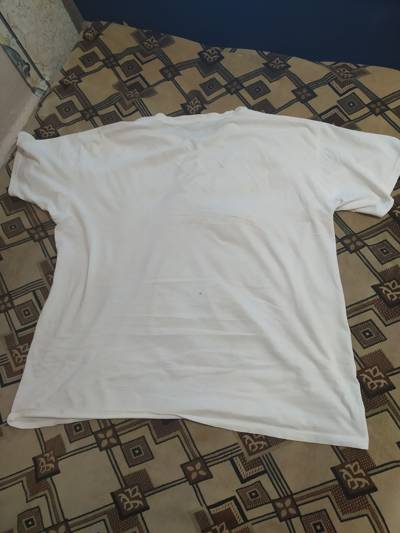

In [4]:
path = './clothing-dataset-small/train/t-shirt'
name = '0a85a584-cb49-4795-b2f1-7eebbf09399a.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

In [5]:
img = load_img(fullname, target_size=(299, 299))

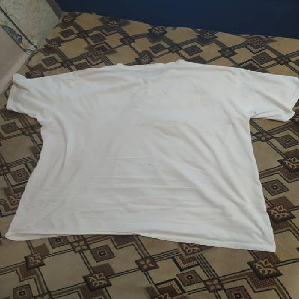

In [6]:
img

In [7]:
x = np.array(img)
x.shape

(299, 299, 3)

In [8]:
x

array([[[ 99,  99,  87],
        [116, 116, 104],
        [114, 114, 102],
        ...,
        [ 23,  30,  46],
        [ 23,  30,  46],
        [ 22,  29,  45]],

       [[106, 106,  94],
        [120, 120, 108],
        [122, 122, 110],
        ...,
        [ 24,  31,  47],
        [ 23,  30,  46],
        [ 23,  30,  46]],

       [[118, 118, 106],
        [125, 125, 113],
        [130, 130, 118],
        ...,
        [ 25,  32,  48],
        [ 24,  31,  47],
        [ 24,  31,  47]],

       ...,

       [[ 79,  72,  53],
        [ 82,  75,  57],
        [ 84,  77,  59],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 115,  93]],

       [[ 86,  79,  60],
        [ 85,  78,  60],
        [ 83,  76,  58],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]],

       [[ 76,  69,  50],
        [ 69,  62,  44],
        [ 64,  57,  39],
        ...,
        [129, 118,  88],
        [128, 116,  90],
        [127, 114,  95]]

The image has the datayype uint8. 'u' means unsigned. Which means that the values are between 0 and 255. And int8 means it takes 8bits or 1 byte.

### 8.3 Pre-trained Convolutional Neural Networks

image-net.org - contains dataset of images and other commonly used subsets for images

keras.io/api/applications/ - contains pre-trained models

In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

I0000 00:00:1733295742.868016   12634 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4231 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [11]:
X = np.array([x])

In [12]:
X.shape

(1, 299, 299, 3)

In [13]:
X = preprocess_input(X)

In [14]:
X[0]

array([[[-0.2235294 , -0.2235294 , -0.31764704],
        [-0.09019607, -0.09019607, -0.18431371],
        [-0.10588235, -0.10588235, -0.19999999],
        ...,
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.827451  , -0.77254903, -0.64705884]],

       [[-0.16862744, -0.16862744, -0.26274508],
        [-0.05882353, -0.05882353, -0.15294117],
        [-0.04313725, -0.04313725, -0.1372549 ],
        ...,
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.81960785, -0.7647059 , -0.6392157 ],
        [-0.81960785, -0.7647059 , -0.6392157 ]],

       [[-0.0745098 , -0.0745098 , -0.16862744],
        [-0.01960784, -0.01960784, -0.11372548],
        [ 0.0196079 ,  0.0196079 , -0.0745098 ],
        ...,
        [-0.8039216 , -0.7490196 , -0.62352943],
        [-0.8117647 , -0.75686276, -0.6313726 ],
        [-0.8117647 , -0.75686276, -0.6313726 ]],

       ...,

       [[-0.38039213, -0.4352941 , -0.58431375],
        [-0

In [15]:
pred = model.predict(X)

I0000 00:00:1733295744.958069   12687 service.cc:148] XLA service 0x7aaa80003210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733295744.958115   12687 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-12-04 15:02:24.986139: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1733295745.223009   12687 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-12-04 15:02:27.341284: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1733295747.919903   12687 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [16]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.9526401)),
  ('n04370456', 'sweatshirt', np.float32(0.009760026)),
  ('n04033995', 'quilt', np.float32(0.003174469)),
  ('n03710637', 'maillot', np.float32(0.0012294676)),
  ('n03188531', 'diaper', np.float32(0.0011785128))]]

In [17]:
pred.shape

(1, 1000)

In [18]:
pred

array([[7.92209266e-06, 2.29341149e-05, 1.85638455e-05, 1.21060302e-05,
        3.55526354e-05, 5.04396376e-05, 1.62474826e-05, 6.66064534e-06,
        1.18040516e-05, 8.65591664e-06, 1.63662025e-05, 9.83995596e-06,
        5.53209429e-06, 1.11219560e-05, 8.19871184e-06, 1.58362473e-05,
        2.06189161e-05, 7.27067800e-06, 1.09244629e-05, 1.35299406e-05,
        6.44589745e-05, 7.36716538e-06, 2.10518901e-05, 8.63634978e-06,
        1.72048603e-05, 2.21924147e-05, 1.01781261e-05, 1.47992032e-05,
        2.73888709e-05, 2.15671989e-05, 1.98430153e-05, 1.62405740e-05,
        1.79347389e-05, 3.21800217e-05, 3.57898134e-05, 2.96767448e-05,
        1.69016384e-05, 2.11803890e-05, 2.22338276e-05, 9.90219996e-06,
        5.81278755e-06, 3.34684410e-05, 1.10083274e-05, 1.24295375e-05,
        2.67433879e-05, 3.06453949e-05, 1.00951638e-05, 1.06622110e-05,
        1.49661710e-05, 2.61652676e-05, 3.30679868e-05, 1.40374168e-05,
        2.60186061e-05, 3.26023837e-05, 1.24906992e-05, 1.829114

Each of this number is the probability of the image belonging to a certain class.

### 8.4 Convolutional Neural Networks
- Types of layers: convolutional and dense
- Convolutional layers and filters
- Dense layers

Convolutional layers are used to extract features from the image. 

Dense layers are used to classify the image.

### Convolutional Layers

##### Filters/Kernels 

The layer uses small matrices called filters or kernels that slide over the input image. Each filter is designed to detect specific features, such as edges, textures, or patterns.

##### Convolution Operation

The convolution operation involves sliding the filter over the image and computing the dot product between the filter and the image patch at each position. This results in a feature map that highlights the presence of the filter's features in the image.

##### Feature Maps

The output of the convolution operation is a feature map, which represents the presence of the filter's features in the image. Multiple filters can be applied to the same image, resulting in multiple feature maps. These feature maps are then combined and processed by subsequent layers to extract higher-level features and eventually classify the image.

##### Downsampling

Downsampling is the process of reducing the spatial dimensions of the feature maps, typically by using pooling layers. This helps in reducing the computational complexity and extracting the most important features.

### Dense Layers

##### Fully Connected
Each neuron in a dense layer receives input from all neurons in the previous layer, allowing it to learn complex patterns.

##### Weights and Biases
Each connection between neurons has an associated weight, and each neuron has a bias. During training, these weights and biases are adjusted to minimize the loss function.

##### Activation Function
An activation function is used to introduce nonlinearity into the network, allowing it to model more complex relationships between inputs and outputs. Common activation functions include ReLU, sigmoid, and tanh.

##### Output 
The output of a dense layer can be a single value (for regression tasks) or a vector of probabilities (for classification tasks).

##### Usage
Dense layers are commonly used in the final layers of a neural network to produce the final output, such as class probabilities in classification tasks.

### 8.5 Transfer Learning
- Is a type of layer in a neural network where each neuron is connected to every neuron in the previous layer. This layer is typically used in the final stages of a neural network to perform classification or regression tasks.



In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train', 
    target_size=(150, 150), 
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [21]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [22]:
X, y = next(train_ds)

In [23]:
y[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [24]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation', 
    target_size=(150, 150), 
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [25]:
# inlcude_top=False means that the top layer (dense layer) of the model is not included.
# trainable=False means that the model is not trained on the data or when we train our model, we don't change the convolutional layers.

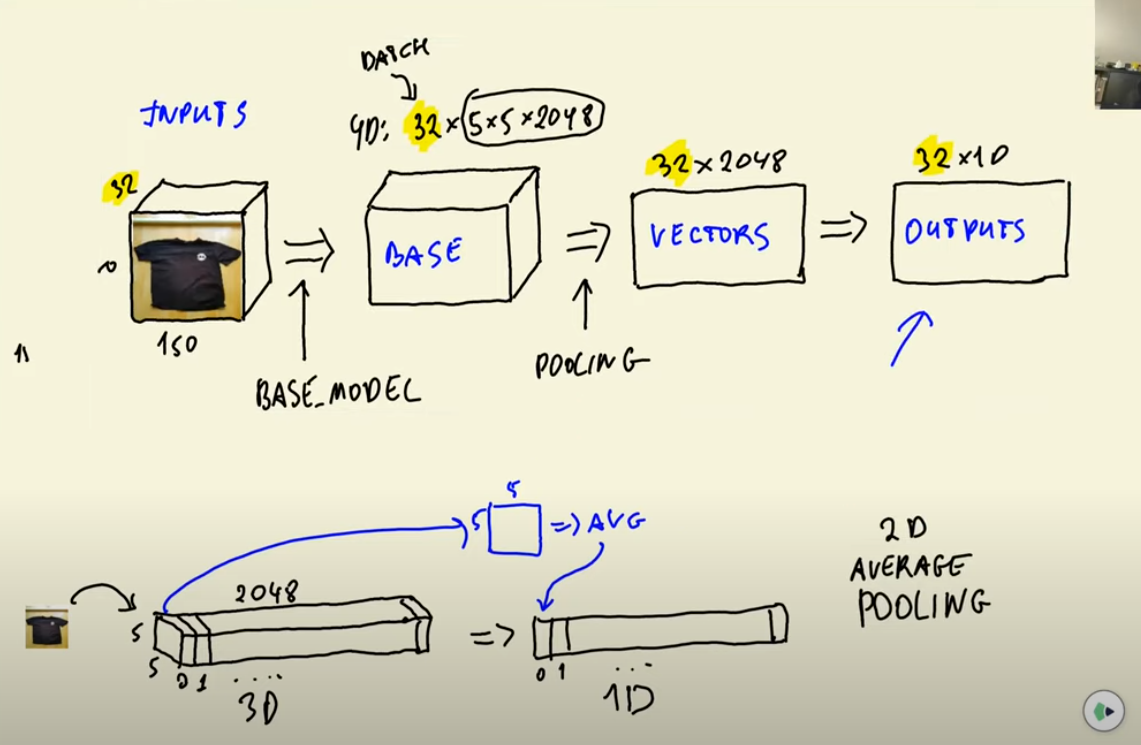

In [26]:
base_model = Xception(weights='imagenet', 
                      input_shape=(150, 150, 3), 
                      include_top=False
)

base_model.trainable = False

In [27]:
# we create a new top

In [28]:
# The result is currently in 3D in which what we need is a vector representation of the image.
# Called as 2D average pooling

'''inputs = keras.Input(shape=(150, 150, 3))'''  # Define the input layer with shape (150, 150, 3) for RGB images

'''base = base_model(inputs)'''  # Pass the inputs through the pre-trained base model (Xception)

'''outputs = base'''  # The output of the base model is assigned to outputs
'''model = keras.Model(inputs, outputs)'''  # Create a new Keras model with the defined inputs and outputs

# Pooling

inputs = keras.Input(shape=(150, 150, 3))  
base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)  # Apply global average pooling to the output of the base model to reduce the spatial dimensions and obtain a vector representation of the features

outputs = keras.layers.Dense(10)(vectors)  # Add a dense layer with 10 units for classification

model = keras.Model(inputs, outputs)  # Create a new Keras model with the defined inputs and outputs

In [29]:
preds = model.predict(X)

2024-12-04 15:02:30.253321: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1011', 92 bytes spill stores, 92 bytes spill loads

2024-12-04 15:02:30.265647: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1011', 384 bytes spill stores, 384 bytes spill loads

2024-12-04 15:02:33.625829: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.50GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [30]:
preds.shape

(32, 10)

In [31]:
# there are many optimizers to choose from in keras

In [32]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [33]:
history = model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


/home/spoofiyy/ml-zoomcamp-tf/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/96 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4081 - loss: 2.2955

2024-12-04 15:02:40.625437: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 344 bytes spill stores, 308 bytes spill loads

2024-12-04 15:02:40.651770: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3717', 112 bytes spill stores, 112 bytes spill loads

2024-12-04 15:02:43.814019: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.48GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


95/96 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.5755 - loss: 1.6346

2024-12-04 15:02:51.417458: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1042', 112 bytes spill stores, 112 bytes spill loads

2024-12-04 15:02:51.419683: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1042', 196 bytes spill stores, 196 bytes spill loads

2024-12-04 15:02:54.000176: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 4.44GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


96/96 ━━━━━━━━━━━━━━━━━━━━ 20s 174ms/step - accuracy: 0.5776 - loss: 1.6257 - val_accuracy: 0.7390 - val_loss: 0.9106
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8499 - loss: 0.4574 - val_accuracy: 0.7361 - val_loss: 1.0319
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.8807 - loss: 0.3512 - val_accuracy: 0.7683 - val_loss: 0.9606
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9010 - loss: 0.2677 - val_accuracy: 0.8094 - val_loss: 0.8479
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9407 - loss: 0.1684 - val_accuracy: 0.7918 - val_loss: 0.9737
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.9615 - loss: 0.1027 - val_accuracy: 0.7977 - val_loss: 0.8917
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9789 - loss: 0.0687 - val_accuracy: 0.8094 - val_loss: 0.9751
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.9880 - loss: 0.0488 - val_accuracy: 0.8123 - val_loss: 

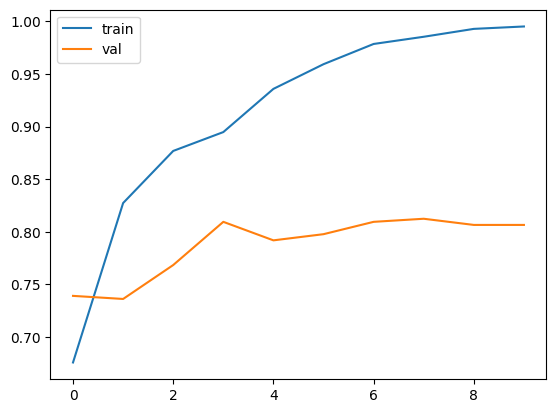

In [34]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()


- The training accuracy increases steadily and approaches 1.0 (or 100%) by the end of the training process. This indicates that the model is learning well from the training data.
- The gap between the training and validation accuracy indicates potential overfitting. The model is learning the training data too well, which may lead to poor performance on unseen data. This is evident as the training accuracy continues to rise while the validation accuracy stagnates.

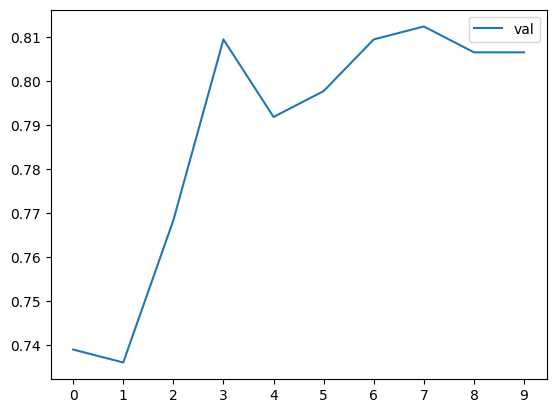

In [35]:
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

#### 8.6 Adjusting the Learning Rate

In [36]:
def make_model(learning_rate=0.01):
    base_model = Xception(weights='imagenet', 
        input_shape=(150, 150, 3), 
        include_top=False
    )

    base_model.trainable = False

    ##############################################################

    inputs = keras.Input(shape=(150, 150, 3))  
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)  
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    ##############################################################

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer, 
        loss=loss, 
        metrics=['accuracy']
    )

    return model

In [37]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, validation_data=val_ds, epochs=10)
    scores[lr] = history.history

    print()
    print()


0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 86ms/step - accuracy: 0.3073 - loss: 2.1417 - val_accuracy: 0.4868 - val_loss: 1.5729
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5465 - loss: 1.4599 - val_accuracy: 0.6276 - val_loss: 1.2164
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.6392 - loss: 1.1920 - val_accuracy: 0.7067 - val_loss: 1.0348
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.6767 - loss: 1.0323 - val_accuracy: 0.7478 - val_loss: 0.9279
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7155 - loss: 0.9133 - val_accuracy: 0.7683 - val_loss: 0.8506
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7346 - loss: 0.8404 - val_accuracy: 0.7859 - val_loss: 0.7999
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7525 - loss: 0.7686 - val_accuracy: 0.7977 - val_loss: 0.7617
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - accuracy: 0.7551 - loss: 0.7558 - val_accuracy: 0.

In [38]:
del scores[0.1]
del scores[0.0001]

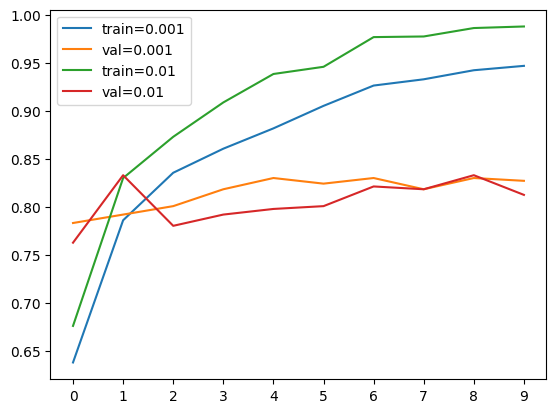

In [39]:
for lr, hist in scores.items():
    plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

The learning rate of 0.001 is better in this case. It leads to a higher and more stable validation accuracy, indicating that the model is learning effectively without overfitting or oscillating too much.

In [40]:
learning_rate = 0.001

#### 8.7 Checkpointing
- Saving the best model only
- Training a model with callbacks

The purpose of this callback is to save the model's weights and architecture at the end of each epoch, allowing you to keep track of the best-performing model based on validation accuracy. This is particularly useful in scenarios where the model might overfit the training data, as you can later load the best model for evaluation or further training.

In [41]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.keras',
    monitor='val_accuracy',
    mode='max'
)

In [44]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)
history = model.fit(
    train_ds, 
    validation_data=val_ds, 
    epochs=10,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.4919 - loss: 1.5042 - val_accuracy: 0.7713 - val_loss: 0.7105
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.7696 - loss: 0.6641 - val_accuracy: 0.8035 - val_loss: 0.6266
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.8365 - loss: 0.5128 - val_accuracy: 0.8035 - val_loss: 0.5855
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.8761 - loss: 0.4145 - val_accuracy: 0.8182 - val_loss: 0.5655
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 0.8904 - loss: 0.3628 - val_accuracy: 0.8182 - val_loss: 0.5395
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9041 - loss: 0.3248 - val_accuracy: 0.8152 - val_loss: 0.5557
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9222 - loss: 0.2837 - val_accuracy: 0.8270 - val_loss: 0.5477
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.9324 - loss: 0.2509 - val_accuracy: 0.8328 - 